# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev1 toc-item"><a href="#Basic-data" data-toc-modified-id="Basic-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic data</a></div><div class="lev1 toc-item"><a href="#Greedy-Algorithm" data-toc-modified-id="Greedy-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Greedy Algorithm</a></div><div class="lev1 toc-item"><a href="#Common-Functions" data-toc-modified-id="Common-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Common Functions</a></div><div class="lev1 toc-item"><a href="#Using-Basemap" data-toc-modified-id="Using-Basemap-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using Basemap</a></div><div class="lev1 toc-item"><a href="#Using-Smopy-(OpenStreetMap)" data-toc-modified-id="Using-Smopy-(OpenStreetMap)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using Smopy (OpenStreetMap)</a></div>

## Initialization

In [2]:
# Basic Imports
from pylab import rcParams
import matplotlib.pyplot as plt

# Greedy Imports
from math import sin, cos, sqrt, atan2, radians
import itertools

# Smopy Imports
import smopy

# Basemap Imports
from mpl_toolkits.basemap import Basemap

# Jupyter Configuration
%matplotlib inline
rcParams['figure.figsize'] = (20,20)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## Basic data

In [2]:
provinces = {
    "cordoba":(-31.416667, -64.183333),
    "la_plata":(-34.933333, -57.95),
    "san_fernando":(-28.468611, -65.779167),
    "resistencia":(-27.451389, -58.986667),
    "rawson":(-43.3, -65.1),
    "corrientes":(-27.483333, -58.816667),
    "parana":(-31.744444, -60.5175),
    "formosa":(-26.184722, -58.175833),
    "san_salvador":(-24.185556, -65.299444),
    "santa_rosa":(-36.620278, -64.290556),
    "la_rioja":(-29.413056, -66.855833),
    "mendoza":(-32.883333, -68.833333),
    "posadas":(-27.366667, -55.896944),
    "neuquen":(-38.95735, -68.045533),
    "viedma":(-40.8, -63),
    "salta":(-24.788333, -65.410556),
    "san_juan":(-31.5375, -68.536389),
    "san_luis":(-33.277222, -66.3525),
    "rio_gallegos":(-51.633333, -69.233333),
    "santa_fe":(-31.633333, -60.7),
    "santiago_del_estero":(-27.784444, -64.266944),
    "ushuaia":(-54.807222, -68.304444),
    "san_miguel":(-26.816667, -65.216667),
}

In [3]:
northermost_lat = -21
southernmost_lat = -56
eastermost_long = -53
westermost_long = -75

In [10]:
GOOGLE = True

## Greedy Algorithm

In [12]:
def main_greedy(start_city=None):
    cities = sorted(i for i in provinces.keys())
    coords = [provinces[i] for i in cities]
    matrix = coord_to_matrix(coords)
    if not start_city is None:
        ruta, route = greedy(matrix, cities, start_city)
        print("Ciudad: {}, Distancia Greedy: {} km".format(start_city, ruta))
        print("Ruta: ", ", ".join(route))
        return route
    else:
        rutas = []
        routes = []
        for city in cities:
            ruta, route = greedy(matrix, cities, city)
            routes.append(route)
            rutas.append(ruta)
        index = rutas.index(min(rutas))
        best_initial_city = cities[index]
        print("Inicio: ", best_initial_city)
        print("Ruta: ", ", ".join(routes[index]))
        print("Distancia: ", rutas[index])
        return routes[index]

def greedy(matrix, cities, initial_city):
    total_distance = 0
    remaining_cities = {city:matrix[i] for i,city in enumerate(cities)}
    next_city = initial_city
    final_cities = [next_city]
    while True:
        if len(remaining_cities) == 1:
            break
        row = remaining_cities.pop(next_city)
        min_distance = min(i for i in row if i > 0 and cities[row.index(i)] in remaining_cities )
        index = row.index(min_distance)
        next_city = cities[index]
        total_distance += min_distance
        final_cities.append(next_city)
    return total_distance, final_cities
    
def coord_to_matrix(coords):
    matrix = []

    for city_coords in coords:
        row = []
        for city_coords_ in coords:
            distance = calc_distance(*city_coords, *city_coords_, google=GOOGLE)
            row.append(distance)
        matrix.append(row)

    return matrix


import urllib.request, json

def calc_distance(lat1, lon1, lat2, lon2, google=None):
    if google is None:
        return calc_distance_harversine(lat1, lon1, lat2, lon2)
    return get_distance_from_google_maps(lat1,lon1,lat2,lon2)

def get_distance_from_google_maps(lat1,lon1,lat2,lon2):
    url = "https://maps.googleapis.com/maps/api/distancematrix/"
    query_string = "json?origins={},{}&destinations={},{}".format(lat1,lon1,lat2,lon2)
    with urllib.request.urlopen(url+query_string) as url:
        data = json.loads(url.read().decode())
    distance_meters = data['rows'][0]['elements'][0]['distance']['value']
    return distance_meters / 1000

def calc_distance_harversine(_lat1, _lon1, _lat2, _lon2):
    """ Use of Haversine Algorithm"""
    
    R = 6373.0
    lat1 = radians(_lat1)
    lon1 = radians(_lon1)
    lat2 = radians(_lat2)
    lon2 = radians(_lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return int(R * c)

## Common Functions

In [6]:
def plot_capital_cities(my_map, conversion_func):
    """Plot Capital Cities"""
    for lat, lon in provinces.values():
        x, y = conversion_func(lon, lat)
        my_map.plot(x, y, 'bo', markersize=2)

def get_vertexes(cities, conversion_func, inverse=False):
    """Convert cities into vertexes groups"""
    vertexes = []
    for city in cities:
        lat, lon = provinces[city]
        if inverse:
            vertex = conversion_func(lon, lat)
        else:
            vertex = conversion_func(lat, lon)
        vertexes.append(vertex)
    return vertexes

def plot_lines_from_vertexes(vertexes, my_map):
    """Plot lines between vertexes"""
    for i in range(len(vertexes)-1):
        x1, y1 = vertexes[i]
        x2, y2 = vertexes[i+1]
        my_map.plot([x1, x2], [y1, y2], color='m', linestyle='-', linewidth=1.5)

## Using Basemap

Inicio:  ushuaia
Ruta:  ushuaia, rio_gallegos, rawson, viedma, neuquen, santa_rosa, san_luis, mendoza, san_juan, la_rioja, san_fernando, san_miguel, santiago_del_estero, salta, san_salvador, resistencia, corrientes, formosa, posadas, parana, santa_fe, cordoba, la_plata
Distancia:  9357.210000000001


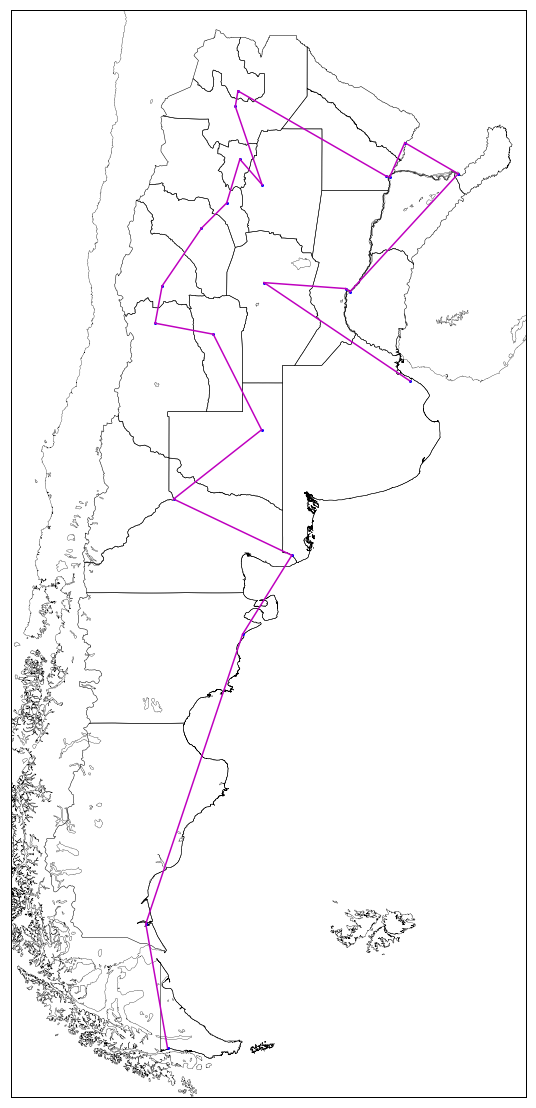

In [13]:
my_map = Basemap(projection='merc', resolution = 'h', area_thresh = 10.0,
    llcrnrlon=westermost_long, llcrnrlat=southernmost_lat,
    urcrnrlon=eastermost_long, urcrnrlat=northermost_lat)

my_map.readshapefile("ARG_adm_shp\ARG_adm1", "cities")
#my_map.readshapefile("ARG_adm_shp\ARG_adm2", "cities")
my_map.drawcoastlines(linewidth=0.3)
my_map.drawmapboundary()

plot_capital_cities(my_map, my_map)
    
cities = main_greedy()

vertexes = get_vertexes(cities, my_map, inverse=True)

plot_lines_from_vertexes(vertexes, my_map)

plt.show()

## Using Smopy (OpenStreetMap)

Lowered zoom level to keep map size reasonable. (z = 5)
Inicio:  cordoba
Ruta:  cordoba, san_luis, mendoza, san_juan, la_rioja, san_fernando, santiago_del_estero, san_miguel, salta, san_salvador, resistencia, corrientes, formosa, posadas, parana, santa_fe, la_plata, santa_rosa, neuquen, viedma, rawson, rio_gallegos, ushuaia


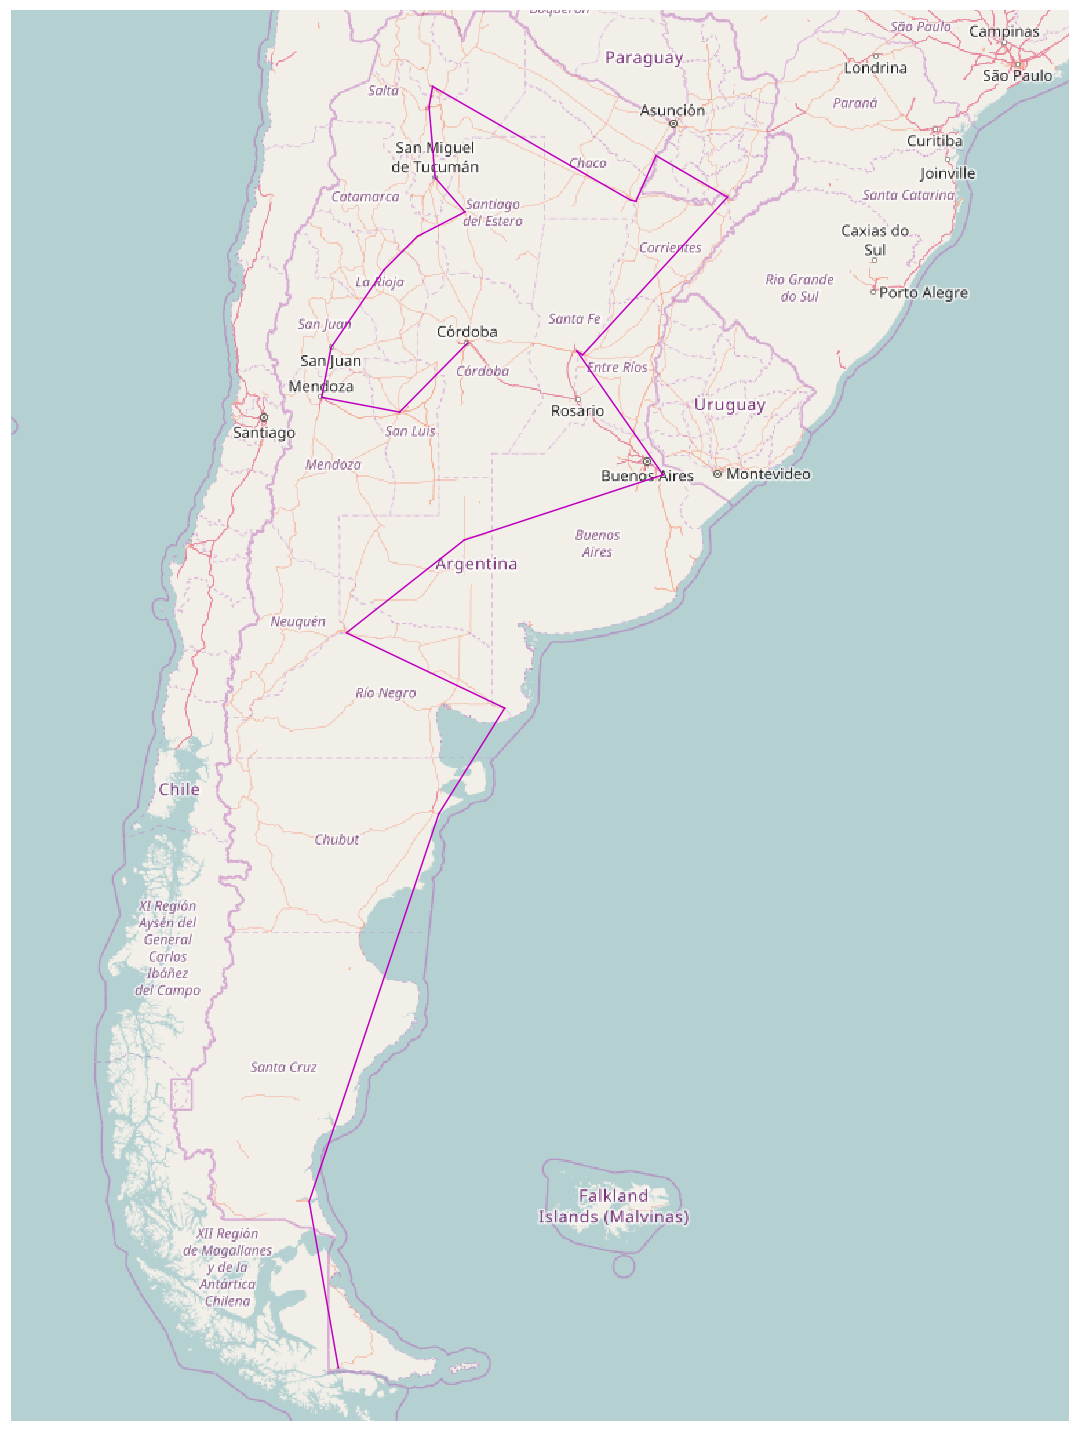

In [8]:
# smopy.TILE_SERVER = "http://b.tile.openstreetmap.org/{z}/{x}/{y}.png"
# "https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png"
# "http://a.tile.stamen.com/toner/{z}/{x}/{y}.png"
# "http://a.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png"
# "http://a.tile.thunderforest.com/landscape/{z}/{x}/{y}.png"
# "http://c.tile.stamen.com/watercolor/{z}/{x}/{y}.jpg"
# "http://b.tile.openstreetmap.org/{z}/{x}/{y}.jpg"

map = smopy.Map(southernmost_lat+6, westermost_long, northermost_lat-3, eastermost_long-4)

my_map = map.show_mpl()

plot_capital_cities(my_map, map.to_pixels)
    
cities = main_greedy()

vertexes = get_vertexes(cities, map.to_pixels)

plot_lines_from_vertexes(vertexes, my_map)

plt.show()

https://maps.googleapis.com/maps/api/distancematrix/json?origins=-32.95,-60.666667&destinations=-34.603333,-58.381667

In [9]:
import urllib.request, json

def get_distance_from_google_maps(lat1,lon1,lat2,lon2):
    url = "https://maps.googleapis.com/maps/api/distancematrix/"
    query_string = "json?origins={},{}&destinations={},{}".format(lat1,lon1,lat2,lon2)
    with urllib.request.urlopen(url+query_string) as url:
        data = json.loads(url.read().decode())
    distance_meters = data['rows'][0]['elements'][0]['distance']['value']
    return distance_meters / 1000


get_distance_from_google_maps(*provinces['ushuaia'],*provinces['rio_gallegos'])

579.339